In [13]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/jash312/hr-employee-attrition-datasets?resource=download&select=HR+Employee+data.csv
source = r"C:\Users\idawud1\OneDrive - JC Penney\Desktop\kaggle data.csv"

df = pd.read_csv(source)

As always, I'll start off by looking at what variables are included in the file. I know what I want to test and what they say. Although I'm sure many of them could offer an interesting angle of analysis, I know the question I'm trying to answer and want to keep it relevant, simple and tidy, whereever possible. 

In [14]:
pd.set_option('display.max_columns', df.columns.size) # I'm adjusting the display settings here to be able to view all columns at once. 
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,2.388214,6338.864486,14281.290695,2.373985,14.777546,3.108247,2.367504,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,0.956279,4638.789110,7116.133478,2.062765,3.031840,0.667023,0.930938,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,1.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,2.000000,2776.500000,8127.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,2.000000,4790.000000,14273.000000,2.000000,14.000000,3.000000,2.000000,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,3.000000,8147.000000,20475.000000,4.000000,17.000000,3.000000,3.000000,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,4.000000,19999.000000,26999.000000,9.000000,25.000000,5.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


Right off the bat, I know I won't need the vast majoirty of these. Variables like "EmployeeID" or "Employee Count" aren't needed and something like "Standard Hours" is the same for each observation. 
However, I may want to segment by Age and Job Level. Of course, I'll also want number of jobs and the columns relating to compensation, but there are 4 of these, two of which reflect a monthly pay frequency. I'll pull those in as well to see if I can figure out which one makes the most sense to use. 


In [15]:
df = pd.concat([df["MonthlyRate"], df["MonthlyIncome"], df["DailyRate"],df["HourlyRate"],  
             (df["NumCompaniesWorked"]+1), df["Age"], df["TotalWorkingYears"],
             df["JobLevel_updated"]], axis = 1)

In [16]:
df.describe()

,MonthlyRate,MonthlyIncome,DailyRate,HourlyRate,NumCompaniesWorked,Age,TotalWorkingYears
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000
mean,14281.290695,6338.864486,803.998287,65.498622,3.373985,36.159949,10.572227
std,7116.133478,4638.789110,356.968483,17.196420,2.062765,8.126696,7.246988
min,2094.000000,1009.000000,102.000000,30.000000,1.000000,18.000000,0.000000
25%,8127.500000,2776.500000,514.500000,52.000000,2.000000,30.000000,6.000000
50%,14273.000000,4790.000000,800.000000,65.000000,3.000000,35.000000,9.000000
75%,20475.000000,8147.000000,1106.000000,79.000000,5.000000,41.000000,14.000000
max,26999.000000,19999.000000,1499.000000,100.000000,10.000000,60.000000,40.000000


A couple things look a bit odd about this data: 
1. First off, the average Monthly Rate is more than double the Monthly Income average. Maybe the latter is post-tax? However, the math for the Daily Rate doesn't seem to add up when compared to the monthly rates or hourly rates. I'm going to annualize these to see if that clears things up. 
2. The "NumCompaniesWorked" columns has a minimum value of 0, meaning that according to this data set, there are people employed by this company who have never been employed before, which is confusing. It's likely referring to prior jobs only, but I'd like to look at total jobs held, so I'm going to add one to each observation in this column. 

In [17]:
df["MonthlyRate_Annu"] = df["MonthlyRate"]*12
df["MonthlyIncome_Annu"] = df["MonthlyIncome"]*12
df["DailyRate_Annu"] = (df["DailyRate"]*264)       #Daily rate * 22 days a month (-8 days for 4 weeks) * 12 months
df["HourlyRate_Annu"] = ((df["HourlyRate"]*8)*22)*12 #Hourly Rate * 8 * 22 days a month * 12 months

In [9]:
df.iloc[:,7:].describe()

,MonthlyRate_Annu,MonthlyIncome_Annu,DailyRate_Annu,HourlyRate_Annu
count,13423.000000,13423.000000,13423.000000,13423.000000
mean,171375.488341,76066.373836,212255.547642,138333.089175
std,85393.601731,55665.469319,94239.679477,36318.839125
min,25128.000000,12108.000000,26928.000000,63360.000000
25%,97530.000000,33318.000000,135828.000000,109824.000000
50%,171276.000000,57480.000000,211200.000000,137280.000000
75%,245700.000000,97764.000000,291984.000000,166848.000000
max,323988.000000,239988.000000,395736.000000,211200.000000


These still look a bit confusing. These should all be fairly close. I did use the "office_code" variable to see if there are any international employees which there are. Different forms of currency in the data set could explain this but after filtering down to one US-based group, I'm still seeing the odd patterns. This data set raises a lot of questions, in a real-life setting I'm not sure I'd feel comfortable using this to inform any recommendations without trying to get more information first. However, because this is a personal project that I'd like to see through, I'm going to get creative. 

In [19]:
df1 = df[(df["JobLevel_updated"]=="L2")]
df1.iloc[:,0:5].corr()

,MonthlyRate,MonthlyIncome,DailyRate,HourlyRate,NumCompaniesWorked
MonthlyRate,1.000000,0.017685,-0.081495,0.024515,-0.003442
MonthlyIncome,0.017685,1.000000,0.052374,0.067318,0.010661
DailyRate,-0.081495,0.052374,1.000000,0.013682,0.010674
HourlyRate,0.024515,0.067318,0.013682,1.000000,0.056985
NumCompaniesWorked,-0.003442,0.010661,0.010674,0.056985,1.000000


I know that pay should, in theory, correlate with age years of experience. In fact, it looks like Monthly Income is the only one that does correlate with both. So, I'm going to discard the other pay-related columns and focus on the annualized Monthly Rate. 

In [67]:
df = df.iloc[:, 4:]#Dropping the non-annualized pay columns 
df.drop(["MonthlyRate_Annu", "DailyRate_Annu", "DailyRate_Annu", "HourlyRate_Annu"], axis = 1, inplace = True)

In [68]:
df.head()

,NumCompaniesWorked,Age,TotalWorkingYears,JobLevel_updated,MonthlyIncome_Annu
0,1,57,39,L7,125904
1,1,52,33,L6,138348
2,1,53,34,L6,122028
3,2,54,35,L7,123768
4,7,57,39,L5,231060


Great, now that I have a (somewhat) clean dataframe I can focus on my primary question. I'd like to take a look at the average pay per number of jobs held, though I suspect that won't offer much, given that job level, age and/or years of experience are probably confounding variables. 

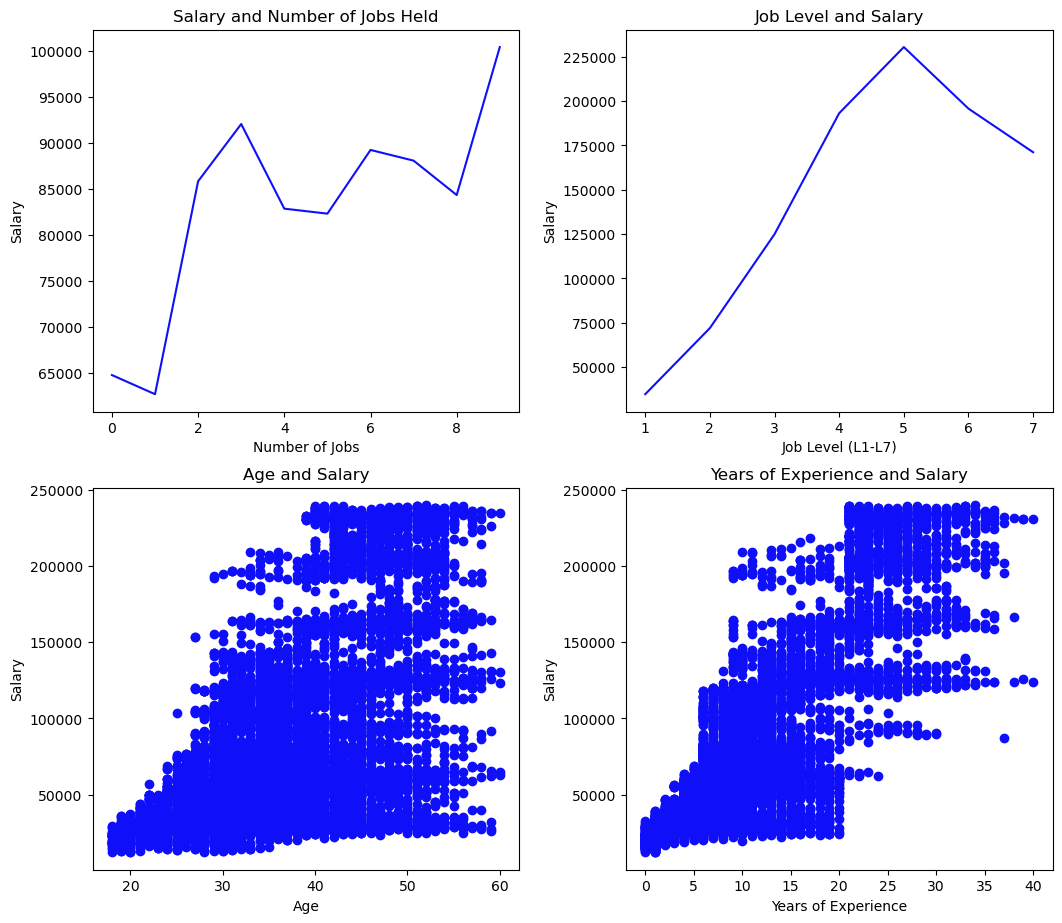

In [520]:

sal_jobs = pd.DataFrame(df["MonthlyIncome_Annu"].groupby(df["NumCompaniesWorked"]).mean().round(2))
sal_lev = pd.DataFrame(df["MonthlyIncome_Annu"].groupby(df["JobLevel_updated"]).mean().round(2))
x1 = np.arange(0, 10, 1)
x2 = np.arange(1, 8, 1)

figs, ax= plt.subplots(nrows=2, ncols=2)
### Plotting the average salaries by number of jobs
ax[0,0].plot(x1, sal_jobs, color = "#0F0FF9")
ax[0,0].set_xlabel("Number of Jobs")
ax[0,0].set_ylabel("Salary")
ax[0,0].set_title('Salary and Number of Jobs Held')


### Adding a second plot to also show the average salary by job level 
ax[0,1].plot(x2, sal_lev, color = "#0F0FF9")
ax[0,1].set_xlabel("Job Level (L1-L7)")
ax[0,1].set_ylabel("Salary")                       
ax[0,1].set_title('Job Level and Salary')


### Adding a second plot to also show the average salary by job level 
ax[1,0].scatter(df["Age"], df["MonthlyIncome_Annu"], color = "#0F0FF9")
ax[1,0].set_xlabel("Age")
ax[1,0].set_ylabel("Salary")                       
ax[1,0].set_title('Age and Salary')


### Adding a second plot to also show the average salary by job level 
ax[1,1].scatter(df["TotalWorkingYears"], df["MonthlyIncome_Annu"], color = "#0F0FF9")
ax[1,1].set_xlabel("Years of Experience")
ax[1,1].set_ylabel("Salary")                       
ax[1,1].set_title("Years of Experience and Salary")



plt.subplots_adjust(left=.25, bottom=.25, right=1.75, top=2, wspace=.25, hspace=None)

plt.show()


From these charts, we can determine the following:

 1.There's a very non-linear relationship between the number of jobs and salary. 
 2.Job Level has an almost curvilinear relationship with salary, meaning they appear to increase in tandem to a certain extent. 
 3.Generally speaking, salary appears to increase alongside age and years of experience but more importantly, the two scatter plots show pretty clear heteroscedasticity across ages and YOE. In other words, the range of salaries is much smaller for employees in their 20s compared to the range of salaries for employees in their 50s, for example.  

This was an, admittedly, long-winded way of showing that I can't just compare average salaries based on number of jobs held. By not taking this difference in variance into account, I'll be comparing apples and oranges. I'll need to segment the employee population and then test for differences.  

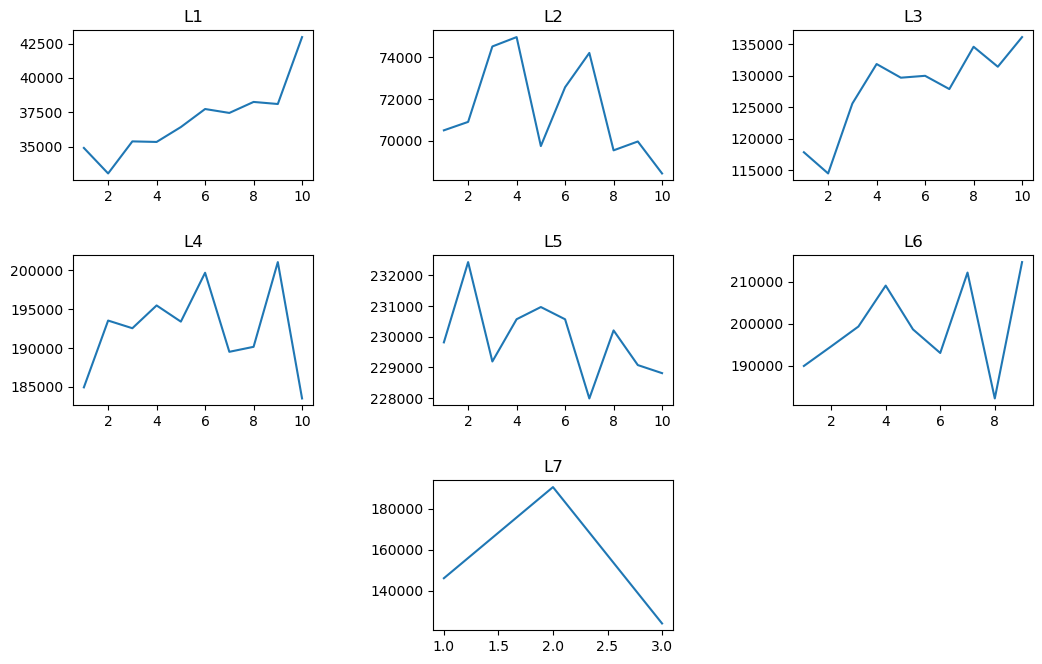

In [790]:
figs, ax= plt.subplots(3, 3)
plt.subplots_adjust(left=.25, bottom=.25, right=1.75, top=1.5, wspace=.5, hspace=.5)
for i in range(0,7):
    a = i+1
    x= "L%s" %a
    df1 = df[(df["JobLevel_updated"]== x)] 
    level_pay = df1["MonthlyIncome_Annu"].groupby(df1["NumCompaniesWorked"]).mean()
    
    if (i <=2): ### Creating an If-loop to determine the plot indices for each plot through each iteration of the For-loop.
        r = 0
        c = i
    elif((i>2) &(i<=5)):
        r = 1
        c = i - 3
    else:
        r = 2
        c = (i - 5)
    
    labs = ((((level_pay/1000).round(1))))
    ax[r, c].plot(level_pay)
    ax[r,c].set_title(x)
figs.delaxes(ax[2, 0])  
figs.delaxes(ax[2, 2])  

Based on these charts, it's safe to say that the number of jobs doesn't necessarily translate to higher pay. While we do see some co-occuring increases in pay and number of jobs at levels 1 and 2, this appears to be the exception rather than the norm. 

L1 - There's a pretty noticable drop in salary for employees with 2 jobs vs one, and even though there appears to be a steady increase in pay as number of jobs increases, this is a very limited change, a difference of about 3k for those with one job vs. those with 9. "Zooming out" in this chart would show a line that would almost look parallel to the x-axis. And that final jump for those with 10 jobs under their belts, represents the salaries of 22 people, likely outliers here. 

L3 - This level shows a promising trend between 2-4 jobs, but this becomes less consistents as it approaches 5-6 jobs. 

